### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### ALC Data

In [2]:
# Load the file
alc_df = pd.read_csv("./data/ALC_Export.csv")

# --- Basic Overview ---
print("Shape of dataset:", alc_df.shape)

# Preview first few rows
alc_df.head()

Shape of dataset: (446292, 9)


,Area,SocCode,GeoLvl,Level1,Level2,Level3,Level4,Average,Label
0,10180,11-1011,1,55.83,85.46,115.10,144.73,115.39,NaN
1,10180,11-1021,1,19.29,33.25,47.20,61.16,47.35,NaN
2,10180,11-2021,1,30.74,43.26,55.79,68.31,55.91,NaN
3,10180,11-2022,1,25.79,38.75,51.70,64.66,51.83,NaN
4,10180,11-2032,1,26.99,34.83,42.68,50.52,42.76,NaN


In [3]:
# 3. Basic info
alc_df.info()

# Check for missing values
alc_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446292 entries, 0 to 446291
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Area     446292 non-null  int64  
 1   SocCode  446292 non-null  object 
 2   GeoLvl   446292 non-null  int64  
 3   Level1   446292 non-null  float64
 4   Level2   446292 non-null  float64
 5   Level3   446292 non-null  float64
 6   Level4   446292 non-null  float64
 7   Average  446292 non-null  float64
 8   Label    33020 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 30.6+ MB


Area            0
SocCode         0
GeoLvl          0
Level1          0
Level2          0
Level3          0
Level4          0
Average         0
Label      413272
dtype: int64

In [5]:
# 4. Wage summary statistics
wage_cols = ['Level1', 'Level2', 'Level3', 'Level4', 'Average']
alc_df[wage_cols].describe()

,Level1,Level2,Level3,Level4,Average
count,446292.000000,446292.000000,446292.000000,4.462920e+05,446292.000000
mean,3881.740884,5140.812953,6399.887293,7.658959e+03,6412.480988
std,14355.931197,19511.318232,25346.937870,3.148680e+04,25407.193379
min,7.250000,7.820000,8.050000,8.280000e+00,8.050000
25%,15.650000,18.410000,20.940000,2.345000e+01,20.970000
50%,19.270000,23.480000,27.660000,3.167000e+01,27.700000
75%,27.230000,33.940000,40.840000,4.775250e+01,40.900000
max,167790.000000,478360.000000,913450.000000,1.348540e+06,917800.000000


In [6]:
# 5. Unique region and occupation codes
print("Unique Areas:", alc_df['Area'].nunique())
print("Unique SOC Codes:", alc_df['SocCode'].nunique())

# Frequency of top SOC codes
alc_df['SocCode'].value_counts().head(10)

Unique Areas: 533
Unique SOC Codes: 848


SocCode
29-2011    533
25-9043    533
25-9042    533
25-9049    533
25-2056    533
25-2055    533
21-1014    533
21-1011    533
13-2023    533
13-2022    533
Name: count, dtype: int64

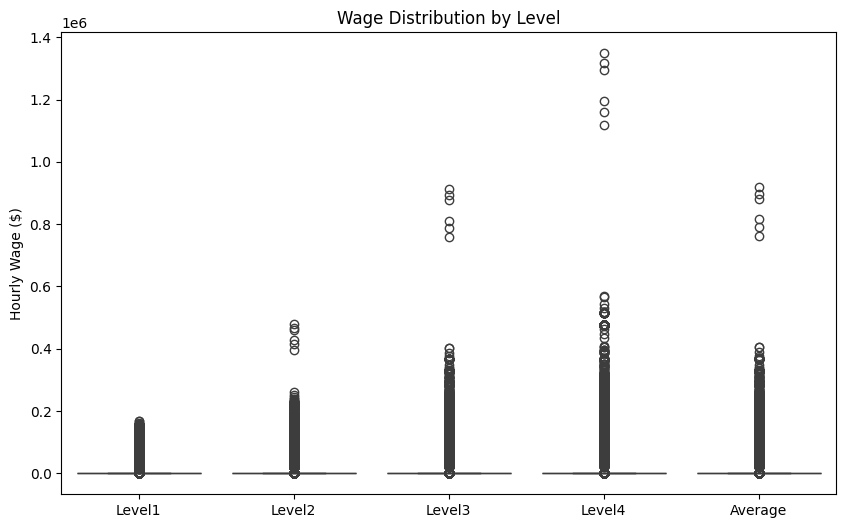

In [7]:
# 6. Boxplot of wages
plt.figure(figsize=(10, 6))
sns.boxplot(data=alc_df[wage_cols])
plt.title("Wage Distribution by Level")
plt.ylabel("Hourly Wage ($)")
plt.show()

In [8]:
# 7. Top 10 highest/lowest paying entries by average wage
top_avg = alc_df.sort_values(by='Average', ascending=False).head(10)
low_avg = alc_df.sort_values(by='Average').head(10)

top_avg[['SocCode', 'Average']]
low_avg[['SocCode', 'Average']]

,SocCode,Average
31649,53-3051,8.05
72425,53-3051,8.42
127892,53-3051,8.44
40195,53-3051,8.48
257442,27-1027,8.49
128679,53-3051,8.65
66824,53-7064,8.75
428,53-7064,8.82
168669,53-7081,8.87
28157,53-3051,8.87


In [9]:
# 8. Distribution of GeoLvl values (1 = MSA, 2 = County, 3 = National)
alc_df['GeoLvl'].value_counts()

GeoLvl
1    191138
2    154909
3     51865
4     48380
Name: count, dtype: int64

#### Geography Data

In [10]:
# 11. Load Geography data
geo_df = pd.read_csv("data/Geography.csv")

# Preview
geo_df.head()

,Area,AreaName,StateAb,State,CountyTownName
0,100001,Northwest Alabama nonmetropolitan area,AL,Alabama,Cullman County
1,100001,Northwest Alabama nonmetropolitan area,AL,Alabama,Fayette County
2,100001,Northwest Alabama nonmetropolitan area,AL,Alabama,Franklin County
3,100001,Northwest Alabama nonmetropolitan area,AL,Alabama,Lamar County
4,100001,Northwest Alabama nonmetropolitan area,AL,Alabama,Marion County


In [11]:
# 12. Basic info and unique areas
geo_df.info()
print("Unique Areas in Geography file:", geo_df['Area'].nunique())
print("Sample Area breakdowns:\n", geo_df.groupby("StateAb")["CountyTownName"].nunique().sort_values(ascending=False).head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area            4991 non-null   int64 
 1   AreaName        4991 non-null   object
 2   StateAb         4991 non-null   object
 3   State           4991 non-null   object
 4   CountyTownName  4991 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.1+ KB
Unique Areas in Geography file: 533
Sample Area breakdowns:
 StateAb
ME    696
MA    351
NH    259
VT    255
TX    254
CT    169
GA    159
VA    135
KY    120
MO    115
Name: CountyTownName, dtype: int64


#### OES SOC Data

In [12]:
# 14. Load SOC-to-title mapping
soc_df = pd.read_csv("data/oes_soc_occs.csv")

# Preview
soc_df.head()

,soccode,Title,Description
0,11-1011,Chief Executives,Determine and formulate policies and provide o...
1,11-1021,General and Operations Managers,"Plan, direct, or coordinate the operations of ..."
2,11-1031,Legislators,"Develop, introduce, or enact laws and statutes..."
3,11-2011,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici..."
4,11-2021,Marketing Managers,"Plan, direct, or coordinate marketing policies..."


#### Merge Wage data (ALC) and Geography based on `Area`

In [13]:
# Join on 'Area' column
merged_df = pd.merge(alc_df, geo_df, on="Area", how="left")

# Display the merged data
merged_df.head()

,Area,SocCode,GeoLvl,Level1,Level2,Level3,Level4,Average,Label,AreaName,StateAb,State,CountyTownName
0,10180,11-1011,1,55.83,85.46,115.1,144.73,115.39,NaN,"Abilene, TX",TX,Texas,Callahan County
1,10180,11-1011,1,55.83,85.46,115.1,144.73,115.39,NaN,"Abilene, TX",TX,Texas,Jones County
2,10180,11-1011,1,55.83,85.46,115.1,144.73,115.39,NaN,"Abilene, TX",TX,Texas,Taylor County
3,10180,11-1021,1,19.29,33.25,47.2,61.16,47.35,NaN,"Abilene, TX",TX,Texas,Callahan County
4,10180,11-1021,1,19.29,33.25,47.2,61.16,47.35,NaN,"Abilene, TX",TX,Texas,Jones County


In [ ]:
# Save merged ALC + Geography data
merged_df.to_csv("data/ALC_with_geography.csv", index=False)

#### Merge Wage data (ALC) and Geography data with SOC Code data on `SocCode` and `soccode`

In [14]:
# Merge with ALC + Geography
merged_soc_df = pd.merge(merged_df, soc_df, left_on="SocCode", right_on="soccode", how="left")

# Drop redundant column
merged_soc_df = merged_soc_df.drop(columns=["soccode"])

# Display result
merged_soc_df.head()

,Area,SocCode,GeoLvl,Level1,Level2,Level3,Level4,Average,Label,AreaName,StateAb,State,CountyTownName,Title,Description
0,10180,11-1011,1,55.83,85.46,115.1,144.73,115.39,NaN,"Abilene, TX",TX,Texas,Callahan County,Chief Executives,Determine and formulate policies and provide o...
1,10180,11-1011,1,55.83,85.46,115.1,144.73,115.39,NaN,"Abilene, TX",TX,Texas,Jones County,Chief Executives,Determine and formulate policies and provide o...
2,10180,11-1011,1,55.83,85.46,115.1,144.73,115.39,NaN,"Abilene, TX",TX,Texas,Taylor County,Chief Executives,Determine and formulate policies and provide o...
3,10180,11-1021,1,19.29,33.25,47.2,61.16,47.35,NaN,"Abilene, TX",TX,Texas,Callahan County,General and Operations Managers,"Plan, direct, or coordinate the operations of ..."
4,10180,11-1021,1,19.29,33.25,47.2,61.16,47.35,NaN,"Abilene, TX",TX,Texas,Jones County,General and Operations Managers,"Plan, direct, or coordinate the operations of ..."


In [15]:
# Save merged ALC, Geography + SOC Code data
merged_soc_df.to_csv("data/ALC_with_geography_and_soc.csv", index=False)